# Trifinder 事件演示

示例展示如何使用 TriFinder 对象。当鼠标在三角剖面上移动时，光标下的三角形会被高亮显示，并且在图形标题中显示该三角形的索引。

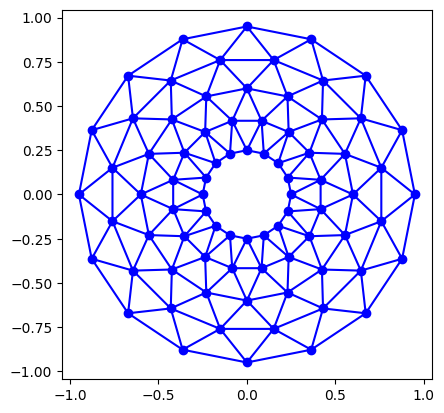

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Polygon
from matplotlib.tri import Triangulation


def update_polygon(tri):
    if tri == -1:
        points = [0, 0, 0]
    else:
        points = triang.triangles[tri]
    xs = triang.x[points]
    ys = triang.y[points]
    polygon.set_xy(np.column_stack([xs, ys]))


def on_mouse_move(event):
    if event.inaxes is None:
        tri = -1
    else:
        tri = trifinder(event.xdata, event.ydata)
    update_polygon(tri)
    ax.set_title(f'In triangle {tri}')
    event.canvas.draw()


# Create a Triangulation.
n_angles = 16
n_radii = 5
min_radius = 0.25
radii = np.linspace(min_radius, 0.95, n_radii)
angles = np.linspace(0, 2 * np.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += np.pi / n_angles
x = (radii*np.cos(angles)).flatten()
y = (radii*np.sin(angles)).flatten()
triang = Triangulation(x, y)
triang.set_mask(np.hypot(x[triang.triangles].mean(axis=1),
                         y[triang.triangles].mean(axis=1))
                < min_radius)

# Use the triangulation's default TriFinder object.
trifinder = triang.get_trifinder()

# Setup plot and callbacks.
fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
ax.triplot(triang, 'bo-')
polygon = Polygon([[0, 0], [0, 0]], facecolor='y')  # dummy data for (xs, ys)
update_polygon(-1)
ax.add_patch(polygon)
fig.canvas.mpl_connect('motion_notify_event', on_mouse_move)
plt.show()